# EECS3401 Final Project

# Author: Ilia Azari, Santusht Arora, Faraz Akbarzadeh, Dan Logvinovsky (Team 10)

**Original Dataset Source: ELGIRIYEWITHANA ,NIDULA . (n.d.). World Stock Prices (Daily Updating). Kaggle. https://www.kaggle.com/datasets/nelgiriyewithana/world-stock-prices-daily-updating?resource=download


# World Stock Prices Description

This Dataset has 12 attributes (listed below) and 279,753 instances of data

**Attributes for student-mat-modified-RA.csv dataset:**

1. Date: The date of the stock price data.
2. Open: The opening price of the stock on that date.
3. High: The highest price the stock reached during the trading day.
4. Low: The lowest price the stock reached during the trading day.
5. Close: The closing price of the stock on that date.
6. Volume: The trading volume, i.e., the number of shares traded on that date.
7. Dividends: Dividends paid on that date (if any).
8. Stock Splits: Information about stock splits (if any).
9. Brand_Name: The name of the brand or company.
10. Ticker: Ticker symbol for the stock.
11. Industry_Tag: The industry category or sector to which the brand belongs.
12. Country: The country where the brand is headquartered or primarily operates.

# 1- Look at the big picture

### Frame the problem (TODO)
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to help inform student advisors of students at risk, and contact them to let them know of available support.

In [110]:
# Import libraries
# you can install missing library using pip install numpy 

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the data

Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series. 
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [111]:
# Download the dataset
# If there is no separator, you can use df = pd.read_csv(url)
# If the dataset is on your local machine use df = pd.read_csv("datasets/student/student-mat-modified-RA.csv")
# If reading from UCI directly, some datasets are available thorugh the ucimlrepo (https://github.com/uci-ml-repo/ucimlrepo)

url = "https://raw.githubusercontent.com/iliaaz101/EECS3401Project/main/World-Stock-Prices-Dataset.csv?token=GHSAT0AAAAAACOWS2ZXJQE5CYCPYAHR5GGAZP45GFQ"
stocks = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
stocks_backup = stocks

## 2.1 Take a quick look at the data structure

Examine the number of rows, the number of columns, and columns labels in the dataset.

- When you use the pd.read_csv() function without specifying any arguments, Pandas assumes that the first row of the CSV file contains column headers.

- If your CSV file does not contain headers, you can explicitly specify this by setting the header argument to None. For example: df = pd.read_csv('data.csv', header=None)

- If your CSV file contains headers but they are not in the first row, you can specify which row to use as headers using the header argument. For example, if your header is in the second row: df = pd.read_csv('data.csv', header=1) 

- You can also provide your own custom column names using the names argument. This is useful if your CSV file doesn't have headers, and you want to provide meaningful column names. For example:

    custom_headers = ["A", "B", "C"]
    
    df = pd.read_csv('data.csv', header=None, names=custom_headers)

In [112]:
stocks

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
279748,2023-08-29 00:00:00-04:00,18.719999,18.770000,18.020000,18.320000,5949600.0,0.0,0.0,foot locker,FL,footwear,usa
279749,2023-08-30 00:00:00-04:00,18.180000,18.650000,17.879999,18.549999,5829500.0,0.0,0.0,foot locker,FL,footwear,usa
279750,2023-08-31 00:00:00-04:00,18.620001,19.850000,18.469999,19.620001,6316100.0,0.0,0.0,foot locker,FL,footwear,usa
279751,2023-09-01 00:00:00-04:00,19.660000,20.139999,19.400000,19.870001,3982400.0,0.0,0.0,foot locker,FL,footwear,usa



#### Use head() to look at the first 5 rows, you can also choose to look at more than the first 5 rows using head(10).


In [113]:
stocks.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2023-09-20 00:00:00-04:00,4.840000,4.910000,4.630000,4.670000,7441900.0,0.0,0.0,peloton,PTON,fitness,usa
1,2023-09-20 00:00:00-04:00,397.049988,397.989990,386.119995,386.299988,3866600.0,0.0,0.0,netflix,NFLX,entertainment,usa
2,2023-09-20 00:00:00-04:00,564.349976,569.219971,562.659973,563.830017,1311500.0,0.0,0.0,costco,COST,retail,usa
3,2023-09-20 00:00:00-04:00,138.550003,139.369995,135.199997,135.289993,46263700.0,0.0,0.0,amazon,AMZN,e-commerce,usa
4,2023-09-20 00:00:00-04:00,179.259995,179.699997,175.399994,175.490005,58436200.0,0.0,0.0,apple,AAPL,technology,usa


#### Use describe() method to see a summary of the numerical attributes.


Example: 25% of the students have an average age lower than 16, while 50% are lower than 17 and 75% are lower than 18.

In [114]:
stocks.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,279753.000000,279753.000000,279753.000000,279753.000000,2.797530e+05,279753.000000,279753.000000
mean,65.162445,65.914283,64.389596,65.167955,2.349103e+07,0.003406,0.000751
std,117.203158,118.573147,115.772027,117.190963,8.864361e+07,0.062041,0.073979
min,0.196890,0.199922,0.192798,0.198861,0.000000e+00,0.000000,0.000000
25%,15.049936,15.253301,14.837500,15.050000,1.350600e+06,0.000000,0.000000
50%,32.329837,32.712338,31.923977,32.330002,4.630800e+06,0.000000,0.000000
75%,72.318681,72.980003,71.635438,72.348923,1.238360e+07,0.000000,0.000000
max,2165.010010,2175.010010,2138.050049,2153.199951,7.421641e+09,10.000000,20.000000


#### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

#### The original dataset in UCI doesn't have any missing values. I have randomly removed values so we can discuss what to do with missing data.

In [115]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279753 entries, 0 to 279752
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          279753 non-null  object 
 1   Open          279753 non-null  float64
 2   High          279753 non-null  float64
 3   Low           279753 non-null  float64
 4   Close         279753 non-null  float64
 5   Volume        279753 non-null  float64
 6   Dividends     279753 non-null  float64
 7   Stock Splits  279753 non-null  float64
 8   Brand_Name    279753 non-null  object 
 9   Ticker        279753 non-null  object 
 10  Industry_Tag  279753 non-null  object 
 11  Country       279753 non-null  object 
dtypes: float64(7), object(5)
memory usage: 25.6+ MB


#### For categorical data, use value_counts to show what categories exist and how many rows belong to each category

In [116]:
stocks["Industry_Tag"].value_counts()

technology            60453
retail                23875
automotive            22384
finance               20205
apparel               19086
food & beverage       17906
consumer goods        17904
entertainment         11340
food                  10413
footwear              10405
aviation              10096
gaming                10050
hospitality            9129
e-commerce             8070
healthcare             5969
manufacturing          5969
logistics              5968
luxury goods           4443
financial services     1973
music                  1378
social media           1116
fitness                1005
cryptocurrency          616
Name: Industry_Tag, dtype: int64

In [117]:
stocks["Brand_Name"].value_counts()


foot locker            5969
microsoft              5969
adobe                  5969
jpmorgan chase & co    5969
marriott               5969
                       ... 
peloton                1005
zoominfo                832
airbnb                  700
roblox                  640
coinbase                616
Name: Brand_Name, Length: 61, dtype: int64

In [118]:
stocks["Ticker"].value_counts()


FL      5969
MSFT    5969
ADBE    5969
JPM     5969
MAR     5969
        ... 
PTON    1005
ZI       832
ABNB     700
RBLX     640
COIN     616
Name: Ticker, Length: 61, dtype: int64

In [119]:
stocks["Country"].value_counts()

usa            219695
japan           17904
germany         14264
netherlands     11936
france           7885
switzerland      5968
canada           2101
Name: Country, dtype: int64

## 2.2 Create a Test Set

Typically, you want to create the test set here, then explore and visualise the training data only to gain insights.
You will also typically prepare the data preprcosssing pipeline using training data only, and then apply the preprocessing on the test dataset.
However, in this demo, we will do the data cleaning and preprocessing on the whole dataset, then split into training and testing datasets right before training the model.


# 3. Explore and visualize the data to gain insights.


### 3.1 Plot a histogram of the data using hist()

The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range. 

Width of each bin is = (max value of data – min value of data) / total number of bins
    - age bin width = (22-15)/20 = 0.35

The default value of the number of bins to be created in a histogram is 10. However, we can change the size of bins using the parameter bins

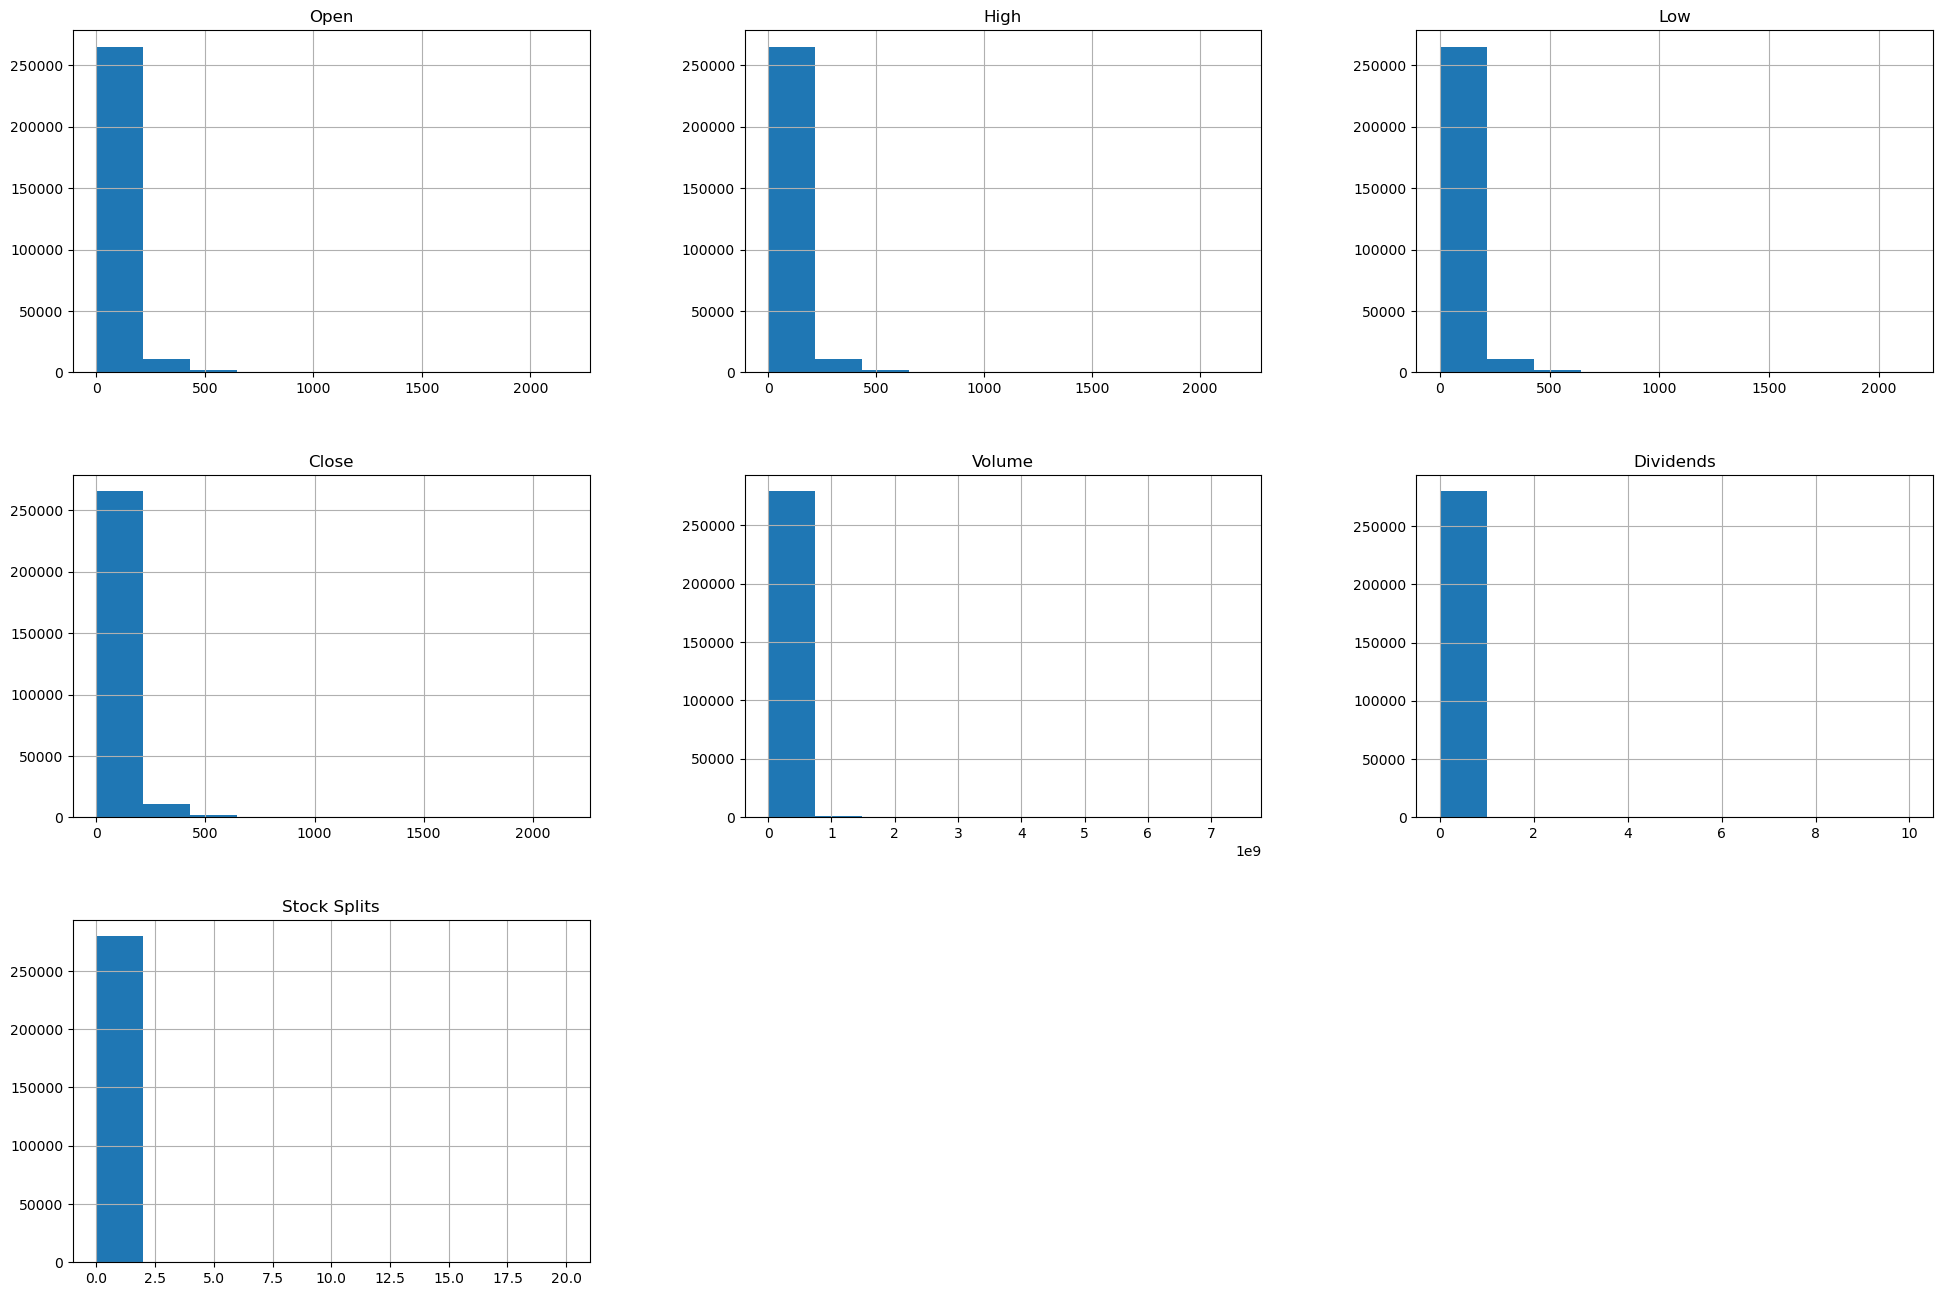

In [120]:
stocks.hist(figsize=(24, 16))
plt.show()

Try changing the number of bins

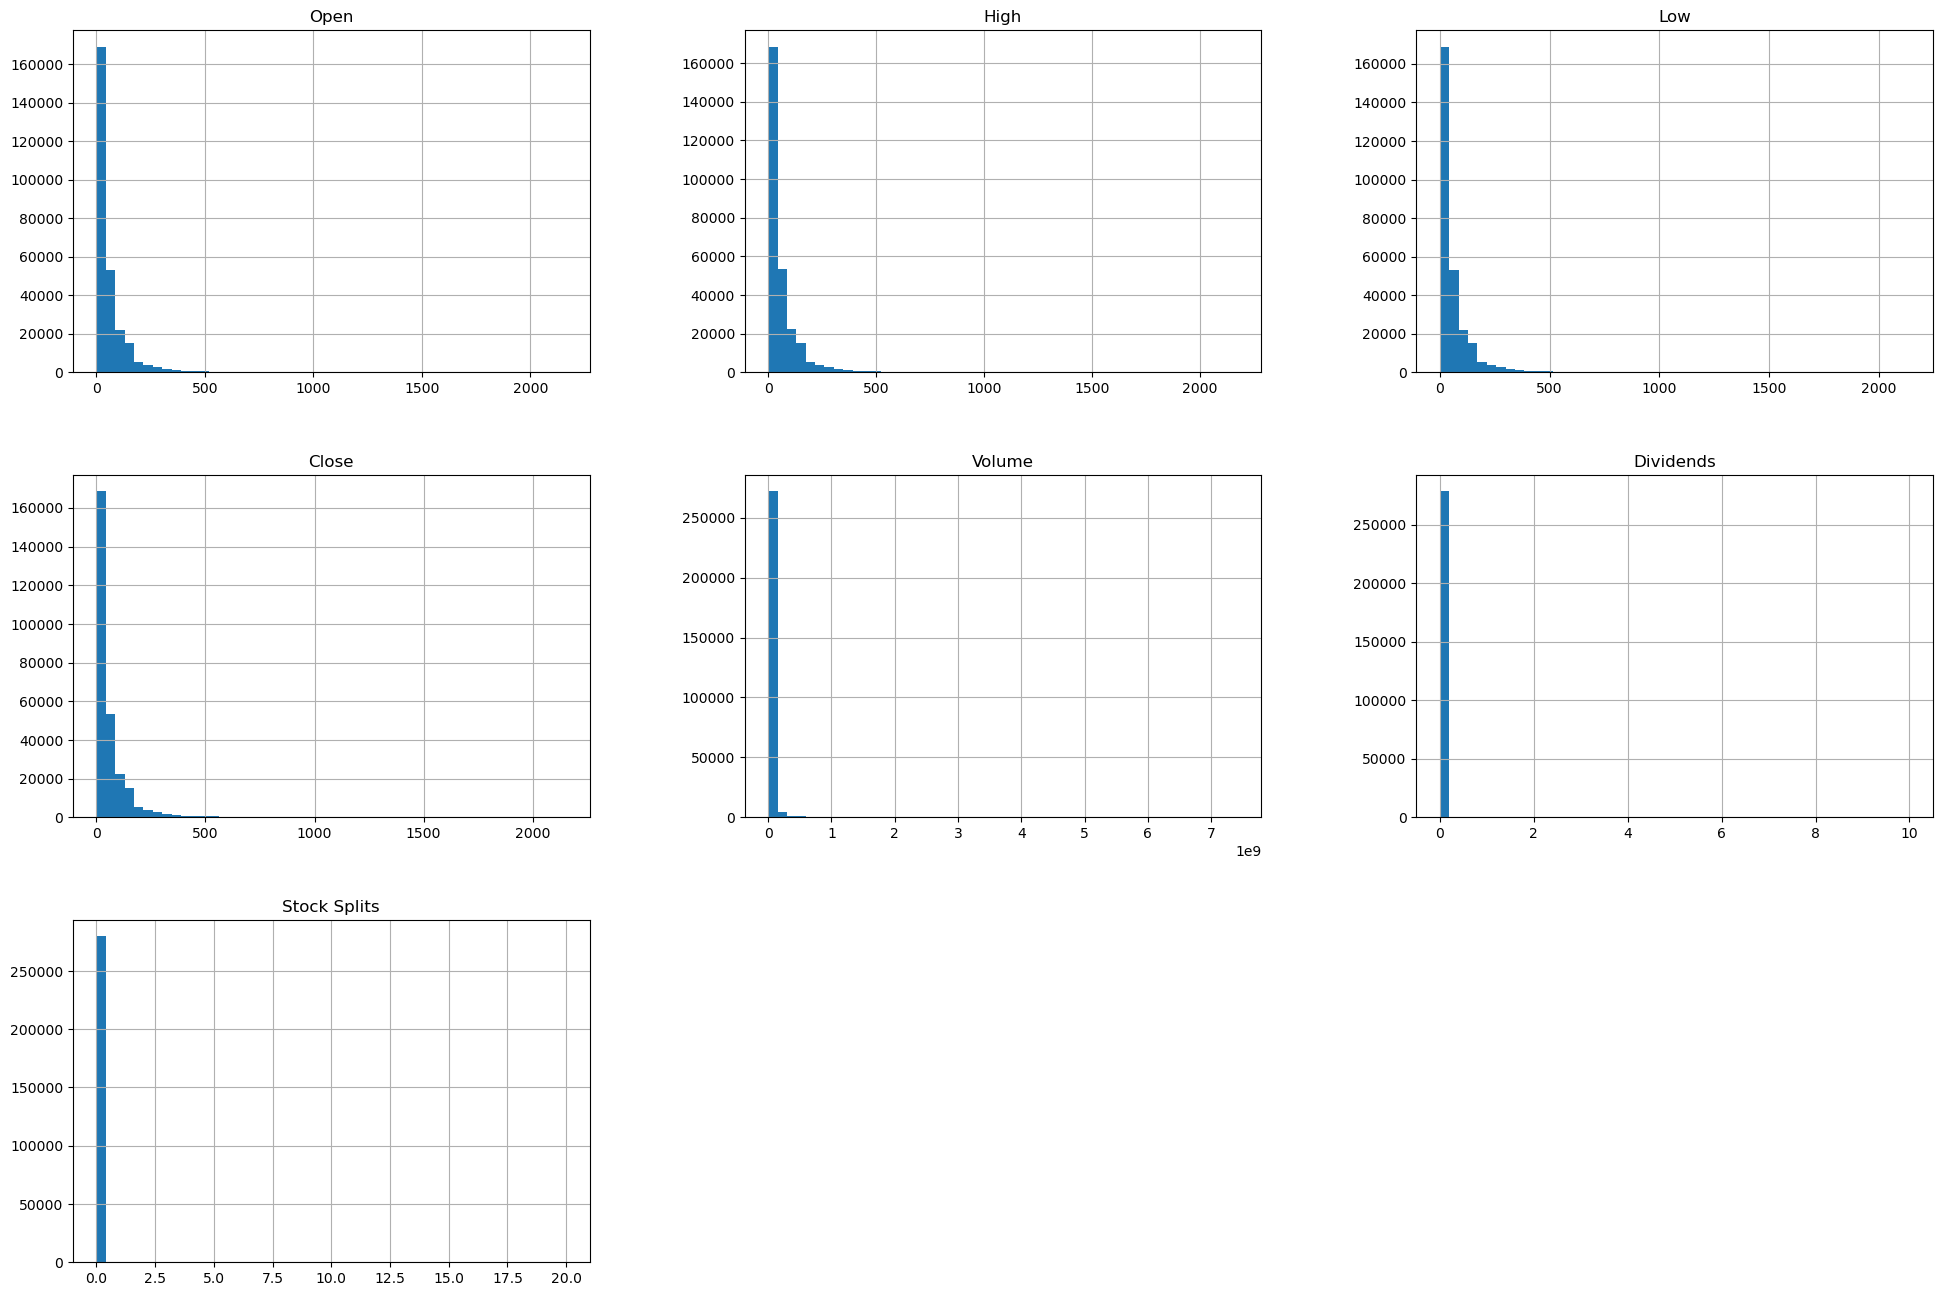

In [121]:
stocks.hist(bins=50, figsize=(24, 16))
plt.show()

#### Note that these attributes have very different scales. We will scale these attributes later.

## Look for correlations between the features

### 3.2 Check for correlation between attributes using sns.pairplot.

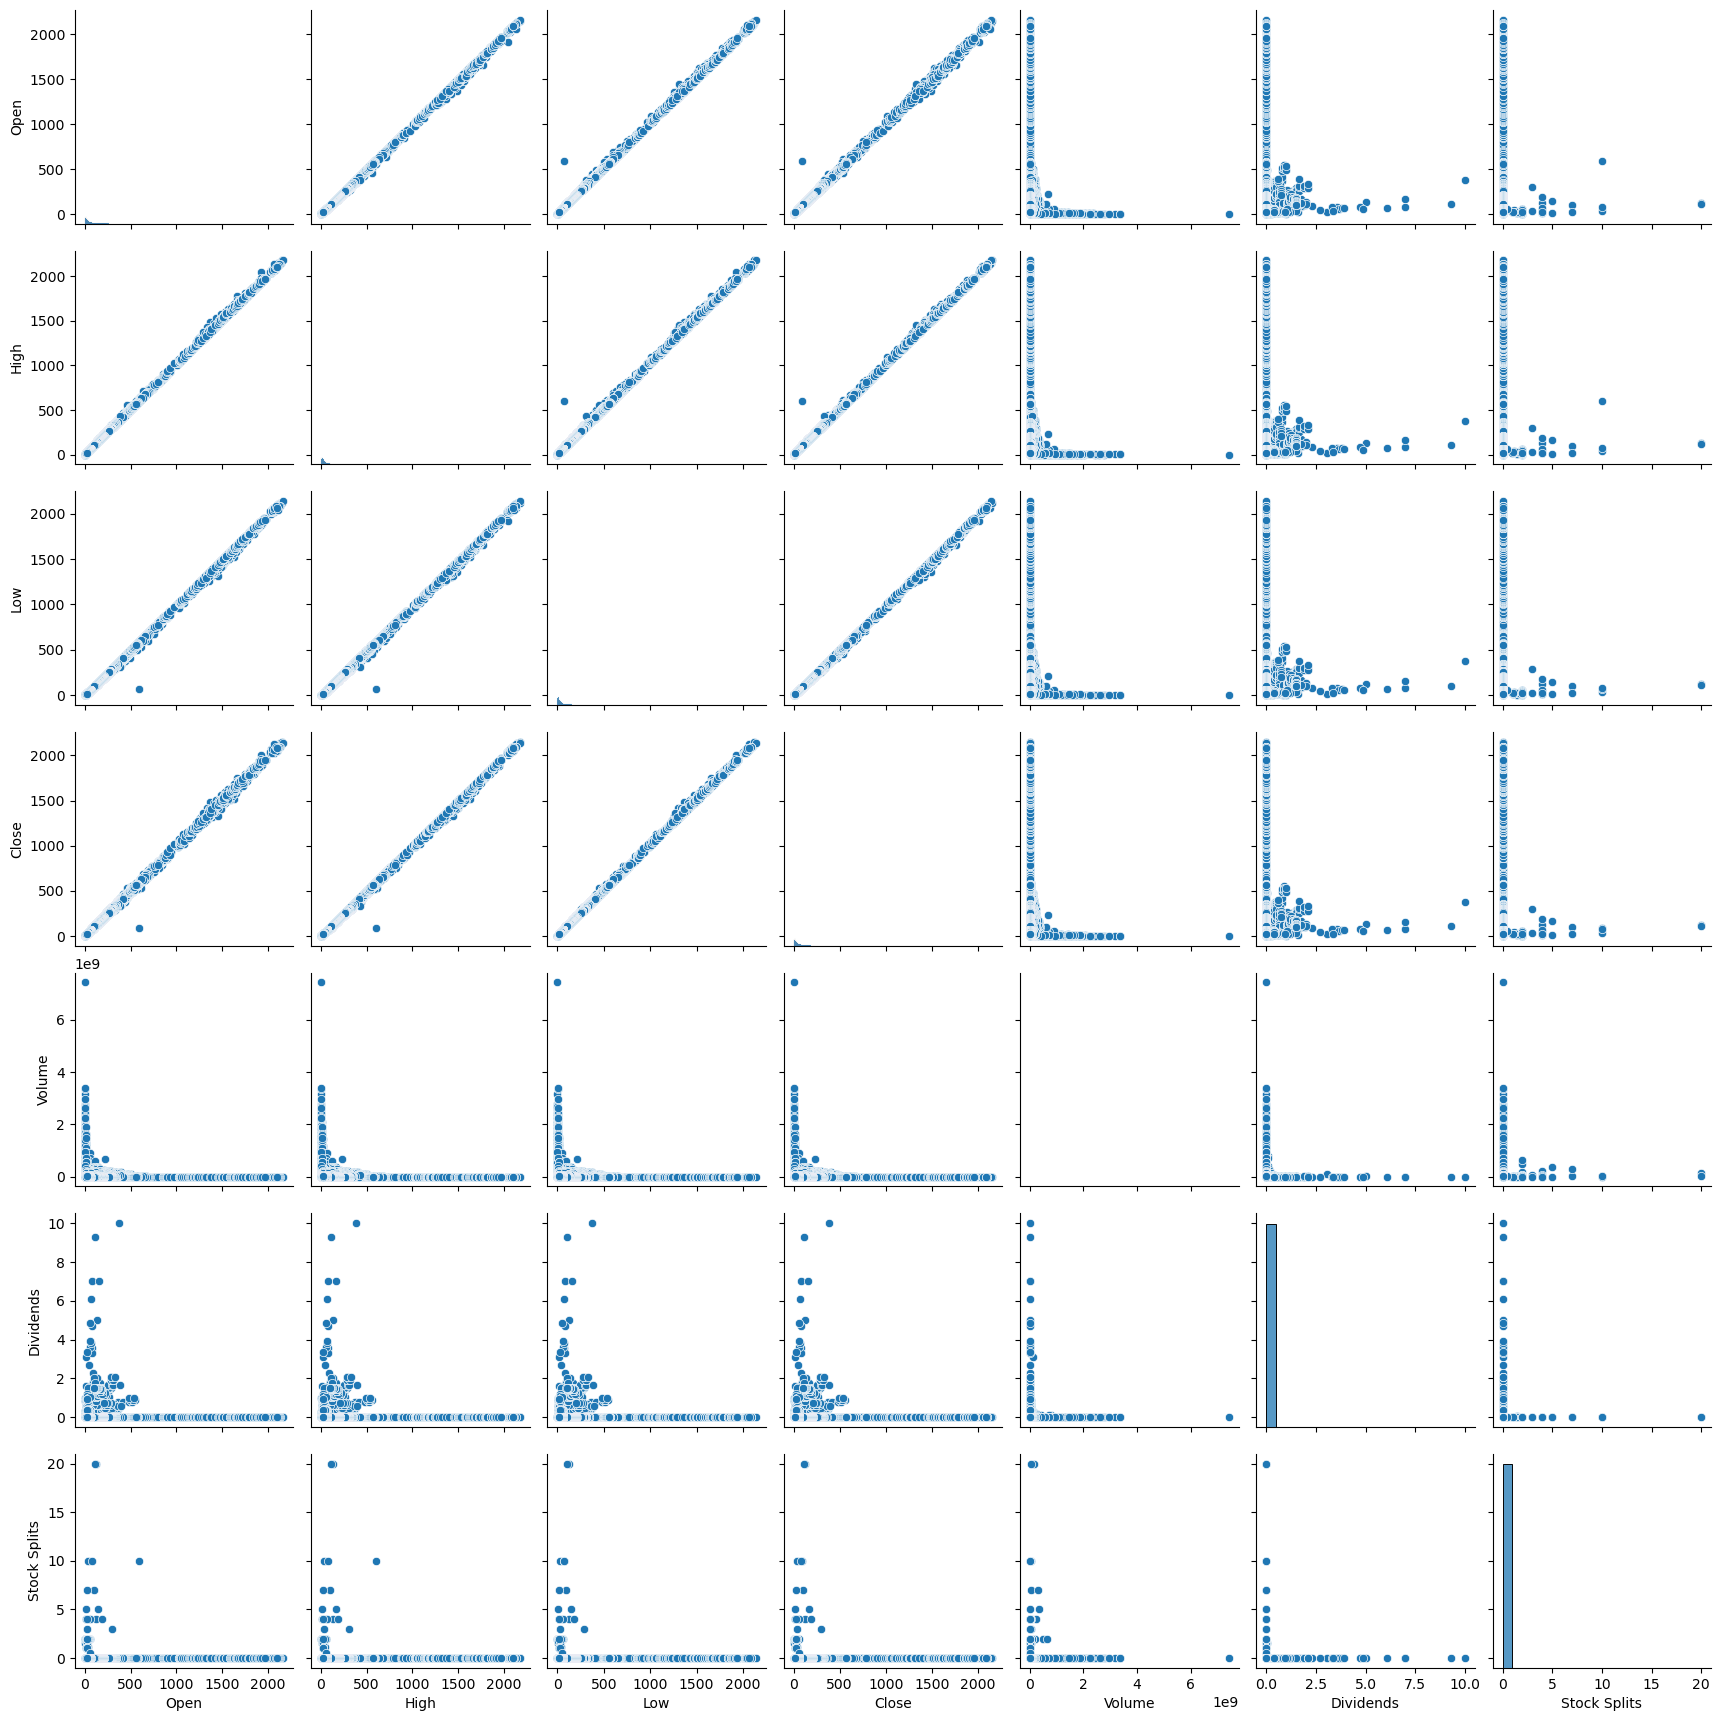

In [122]:
#Check for correlation between attributes using sns.pairplot.
sns.pairplot(stocks)

### 3.3 Look for correlations using pearson correlation coefficient 

In [123]:
corr_matrix = stocks.corr()
corr_matrix

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999911,0.999858,0.999780,-0.080539,0.017611,0.001836
High,0.999911,1.000000,0.999817,0.999873,-0.080192,0.017468,0.001907
Low,0.999858,0.999817,1.000000,0.999907,-0.080941,0.017755,-0.000366
Close,0.999780,0.999873,0.999907,1.000000,-0.080560,0.017617,-0.000224
Volume,-0.080539,-0.080192,-0.080941,-0.080560,1.000000,-0.009819,0.004537
Dividends,0.017611,0.017468,0.017755,0.017617,-0.009819,1.000000,-0.000499
Stock Splits,0.001836,0.001907,-0.000366,-0.000224,0.004537,-0.000499,1.000000


#### Let's look at correlations with regard to our target (TODO WHAT IS OUR TARGET)

In [124]:
corr_matrix["Close"].sort_values(ascending=False)

Close           1.000000
Low             0.999907
High            0.999873
Open            0.999780
Dividends       0.017617
Stock Splits   -0.000224
Volume         -0.080560
Name: Close, dtype: float64

# 4. Prepare the data for Machine Learning Algorithms

#### Let's start by cleaning up the data: duplicate and missing values and how to deal with them

### 4.1- Remove duplicate rows

In [125]:
# Check for duplicate rows and delete them
stocks.duplicated().sum()

0

In [126]:
# Remove duplicated
stocks.drop_duplicates(inplace=True)

### 4.1.1 - Removing the Dividend and Stocks Splits columns (Irrelevant)

In [127]:
# Dropping the Dividend feature

stocks.drop(labels=['Dividends'], axis=1, inplace=True)

# Dropping the Stock Splits feature

stocks.drop(labels=['Stock Splits'], axis=1, inplace=True)

### 4.2-Handle the missing values

In [128]:
# Find the number of missing values in each column

stocks.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
dtype: int64

#### Choosing only the Apple Data with Ticker AAPL

In [129]:
stocks = stocks[stocks['Ticker'] == 'AAPL']


#### Splitting the Date Column into Day, Month, Year and Keeping last 3 year info

In [130]:
import pandas as pd

# Assuming 'stocks' is your DataFrame

# Step 1: Ensure conversion to datetime, coercing errors to NaT
stocks['Date'] = pd.to_datetime(stocks['Date'], errors='coerce', utc=True)

# Optional: Handle rows with NaT in the 'Date' column
# For example, to drop these rows, uncomment the following line:
# stocks = stocks.dropna(subset=['Date'])

# Now, filter the dataset for dates from 2021 onwards
stocks = stocks[stocks['Date'].dt.year >= 2021]

# Step 2: Split the 'Date' column into 'Day', 'Month', and 'Year' columns
stocks['Day'] = stocks['Date'].dt.day
stocks['Month'] = stocks['Date'].dt.month
stocks['Year'] = stocks['Date'].dt.year

# Step 3: Drop the original 'Date' column
stocks = stocks.drop('Date', axis=1)

C:\Users\iliaa\AppData\Local\Temp\ipykernel_4384\2089049159.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['Day'] = stocks['Date'].dt.day
C:\Users\iliaa\AppData\Local\Temp\ipykernel_4384\2089049159.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['Month'] = stocks['Date'].dt.month
C:\Users\iliaa\AppData\Local\Temp\ipykernel_4384\2089049159.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [131]:
# Dropping the guardian feature

# students.drop(labels=['guardian'], axis=1, inplace=True)

#### For the famsize attribute we will delete the instances with null famsize values

In [132]:
# students.dropna(subset=["famsize"], inplace=True)

#### For the remaining missing values, we will fill the mean if it is a numerical value and the most frequent if it is a categorical column.

#### We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.




### 4.3. Create a pipeline that will 

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler. Do not scale the target

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

4. Encode the categorical columns using OneHotEncoder


In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [134]:
#create the cat and num columns
num_cols = stocks.select_dtypes(include='number').columns.to_list()
cat_cols = stocks.select_dtypes(exclude='number').columns.to_list()

#exclude the target from numerical columns
num_cols.remove("Close")

#create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

#use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

#### Display your pipeline

In [135]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Open', 'High', 'Low', 'Volume', 'Day',
                                  'Month', 'Year']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Brand_Name', 'Ticker', 'Industry_Tag',
                                  'Country'])])

In [136]:
# Apply preprocessing
stocks_prepared = preprocessing.fit_transform(stocks)

# Convert to dense matrix if necessary
if hasattr(stocks_prepared, "toarray"):
    stocks_prepared = stocks_prepared.toarray()

# Handling feature names for numerical columns
feature_names = num_cols.copy()

# Retrieving feature names for categorical features processed by OneHotEncoder
ohe_feature_names = preprocessing.named_transformers_['cat'].named_steps['onehotencoder'].get_feature_names_out()

# Extending the feature names list with the one-hot encoded feature names
feature_names.extend(ohe_feature_names)

# If there's an additional column passed through, add it to the feature names list
# Replace 'additional_column' with the actual column name
if 'remainder' in preprocessing.named_transformers_:
    feature_names.append('remainder__Close')

# Ensure the length of feature names matches the number of columns in stocks_prepared
assert len(feature_names) == stocks_prepared.shape[1], "The number of feature names does not match the number of columns in the transformed data."

# Create DataFrame
stocks_prepared_df = pd.DataFrame(stocks_prepared, columns=feature_names)

stocks_prepared_df


,Open,High,Low,Volume,Day,Month,Year,x0_3m,x0_adidas,x0_adobe,...,x2_social media,x2_technology,x3_canada,x3_france,x3_germany,x3_japan,x3_netherlands,x3_switzerland,x3_usa,remainder__Close
0,-0.707481,-0.708577,-0.707067,-0.214133,0.500917,0.869237,1.394896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.670000
1,1.057564,1.040723,1.030054,-0.371120,0.500917,0.869237,1.394896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,386.299988
2,1.810457,1.802738,1.833932,-0.483310,0.500917,0.869237,1.394896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,563.830017
3,-0.105752,-0.110198,-0.112515,1.490476,0.500917,0.869237,1.394896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,135.289993
4,0.077453,0.069280,0.070537,2.024953,0.500917,0.869237,1.394896,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,175.490005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41642,-0.645018,-0.646897,-0.646096,-0.279658,1.531108,0.565062,1.394896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.320000
41643,-0.647448,-0.647431,-0.646733,-0.284932,1.645574,0.565062,1.394896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.549999
41644,-0.645468,-0.642090,-0.644047,-0.263566,1.760039,0.565062,1.394896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.620001
41645,-0.640787,-0.640800,-0.639812,-0.366035,-1.673930,0.869237,1.394896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.870001


# 5. Select a model and train it

## 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [137]:
from sklearn.model_selection import train_test_split

X = stocks_prepared_df.drop(["remainder__Close"], axis=1)
y = stocks_prepared_df["remainder__Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33317, 159) (33317,) (8330, 159) (8330,)


### 5.2 Train a Linear Regression model 

In [138]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)



LinearRegression()

### Test your model on the test set, and report on the Mean Squared Error

In [139]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

4.068384179072917

### 5.3 Train a Linear Regression model using KFold cross-validation with 5 folds, and report on the cross validation score, use negative mean squared error as the cross validation metric.

In [140]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-4.13203507, -4.1319528 , -4.42690298, -3.98168132, -4.07920271])

### 5.4 Calculate the mean and standard deviation of the cross-validation scores to get an overall assessment of the model's performance:

In [141]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')


Cross-Validation Mean Score: 4.150354975810844


**NOTE** cross_val_score in scikit-learn does allow you to use mean squared error (MSE) as a scoring metric. 

However, you should use 'neg_mean_squared_error' as the scoring parameter when you call cross_val_score. 

The reason for this naming convention is that cross_val_score follows a convention where greater values are better for scoring, while MSE is typically minimized (you want it to be as small as possible). 

To reconcile this, you use the negative MSE, which turns it into a maximizing score (higher is better).

Here's how you can use cross_val_score with negative mean squared error:

scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error, greater_is_better=False))



### 5.5 Train a Linear Regression model using Ridge and Lasso regularization with alpha=1

In [142]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)


LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)


c:\Users\iliaa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.947e+05, tolerance: 1.654e+05
  model = cd_fast.enet_coordinate_descent(


### Test your models on the test dataset and report on the MSE

In [143]:
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse=mse(y_test, Lasso_y_predict)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Ridge Regression MSE: 3.9960685083265344
Lasso Regression MSE: 14.725500284620445


Compare the results from all the models

In [144]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Cross-Validation Mean Score: {mean_score}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')


Linear Regression MSE: 4.068384179072917
Cross-Validation Mean Score: 4.150354975810844
Ridge Regression MSE: 3.9960685083265344
Lasso Regression MSE: 14.725500284620445


### 5.6 Plot the prediction vs. actual for the best performing model

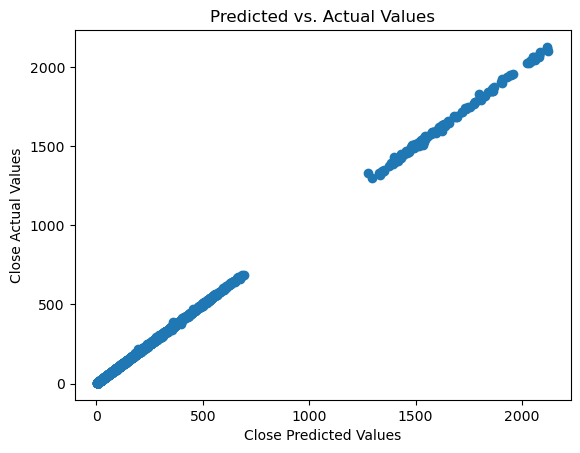

In [145]:
import matplotlib.pyplot as plt

# Assuming 'lr_model' is your best performing trained linear regression model
lr_y_predict = lr_model.predict(X_test)  # X is your feature data
plt.scatter(lr_y_predict, y_test)  # y is your actual target values
plt.xlabel("Close Predicted Values")
plt.ylabel("Close Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

# Markdown for Jupyter notebooks cheatsheet

Source: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

Here's how to format Markdown cells in Jupyter notebooks:

Headings

Use the number sign (#) followed by a blank space for notebook titles and section headings:
# for titles
## for major headings
### for subheadings
#### for 4th level subheadings

### Emphasis

Use the following code to emphasize text:

Bold text: __string__ or **string**

Italic text: _string_ or *string*


### Bullets

To create a circular bullet point, use one of the following methods. Each bullet point must be on its own line.

A hyphen (-) followed by one or two spaces, for example: - Bulleted item

A space, a hyphen (-) and a space, for example: - Bulleted item

An asterisk (*) followed by one or two spaces, for example: * Bulleted item

## Numbered lists

To create a numbered list, enter 1. followed by a space, for example:
1. Numbered item
1. Numbered item

For simplicity, you use 1. before each entry. The list will be numbered correctly when you run the cell.

